In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=pd.read_csv('linearX.csv').values.flatten()
y=pd.read_csv('linearY.csv').values.flatten()

In [4]:
#normlaization of data
x_mean, x_std=np.mean(x),np.std(x)
x = (x - x_mean) / x_std
y_mean, y_std = np.mean(y), np.std(y)
y = (y - y_mean) / y_std

In [5]:
def initialize_param():
    return np.random.randn(), np.random.randn()
    

In [6]:
def comp_cost(y,x,w,b):
    m=len(x)
    predictions=w*x+b
    return np.sum((predictions-y)**2)/(2*m)

In [7]:
def gd_Calc(x, y, w, b, lr, num_iter, tol=1e-6):
    m = len(x)
    predi=0
    cost_history = []
    for i in range(num_iter):
        pred = w * x + b
        predi=pred
        dw = (1 / m) * np.sum((pred - y) * x)
        db = (1 / m) * np.sum(pred - y)
        print(dw)
        print(db)
        w -= lr * dw
        b -= lr * db
        cost = comp_cost(x, y, w, b)
        cost_history.append(cost)
        if i > 0 and abs(cost_history[-2] - cost) < tol:
            break
    return w, b, cost_history

In [8]:
lrate=0.5
num_iter=1000
w,b=initialize_param()
w,b,cost_history=gd_Calc(x,y,w,b,lrate,num_iter)

-0.25980011571996614
-0.7507073701910718
-0.12990005785998293
-0.3753536850955359
-0.06495002892999141
-0.1876768425477679
-0.03247501446499569
-0.0938384212738839
-0.016237507232497842
-0.046919210636941926
-0.00811875361624892
-0.023459605318470994
-0.00405937680812439
-0.011729802659235474
-0.0020296884040622567
-0.005864901329617728
-0.0010148442020311075
-0.002932450664808883
-0.000507422101015628
-0.001466225332404466


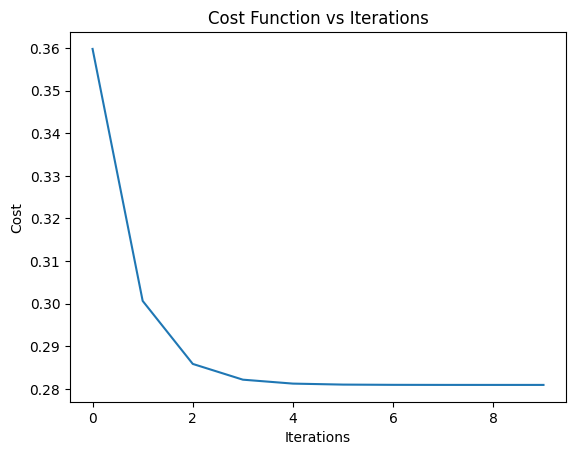

In [9]:
plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

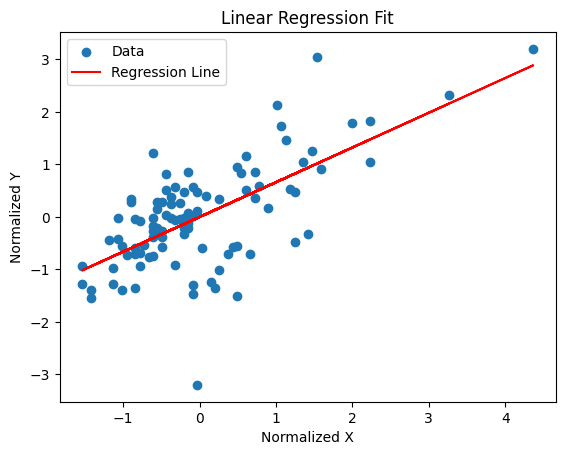

In [10]:
plt.scatter(x, y, label="Data")
plt.plot(x, w * x + b, color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("Normalized X")
plt.ylabel("Normalized Y")
plt.legend()
plt.show()

-0.7732212656792383
-1.055102451258552
-0.769355159350842
-1.049826939002259
-0.7655083835540879
-1.0445778043072482
-0.7616808416363173
-1.0393549152857118
-0.7578724374281357
-1.0341581407092832
-0.754083075240995
-1.028987350005737
-0.75031265986479
-1.023842413255708
-0.7465610965654662
-1.0187232011894294
-0.7428282910826388
-1.0136295851834827
-0.7391141496272257
-1.008561437257565
-0.7354185788790895
-1.0035186300712773
-0.7317414859846941
-0.9985010369209207
-0.7280827785547705
-0.9935085317363164
-0.7244423646619966
-0.9885409890776345
-0.7208201528386866
-0.9835982841322464
-0.7172160520744933
-0.9786802927115853
-0.7136299718141208
-0.9737868912480274
-0.7100618219550504
-0.9689179567917869
-0.706511512845275
-0.9640733670078282
-0.7029789552810486
-0.959253000172789
-0.6994640605046434
-0.9544567351719251
-0.6959667402021202
-0.9496844514960654
-0.6924869065011094
-0.9449360292385852
-0.6890244719686041
-0.9402113490923921
-0.6855793496087611
-0.9355102923469304
-0.68215145

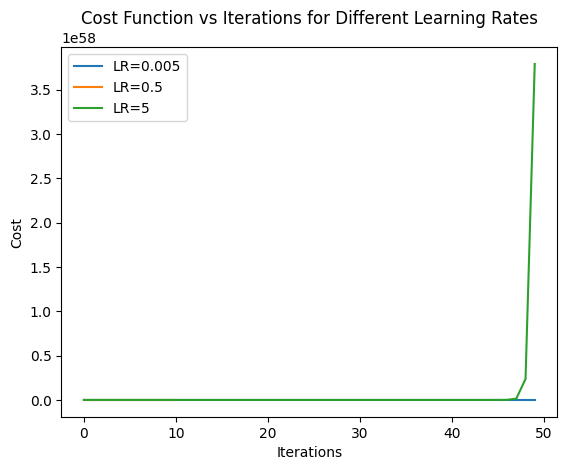

In [12]:
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    w, b = initialize_param()
    _, _, cost_history = gd_Calc(x, y, w, b, lr, 50)
    plt.plot(range(len(cost_history)), cost_history, label=f"LR={lr}")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()